In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import rasterio as rst
from rasterio.mask import mask
import geopandas as gpd

from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

import warnings
warnings.filterwarnings("ignore")

In [22]:
idpdd_f = pd.read_csv('D:/thesis_data/VEG_INDICES/dpsvi_parameters/stats/florestal_IDPDD_reindex.csv')
idpdd_s = pd.read_csv('D:/thesis_data/VEG_INDICES/dpsvi_parameters/stats/savanica_IDPDD_reindex.csv')
idpdd_c = pd.read_csv('D:/thesis_data/VEG_INDICES/dpsvi_parameters/stats/campestre_IDPDD_reindex.csv')

In [23]:
vddpi_f = pd.read_csv('D:/thesis_data/VEG_INDICES/dpsvi_parameters/stats/florestal_VDDPI_reindex.csv')
vddpi_s = pd.read_csv('D:/thesis_data/VEG_INDICES/dpsvi_parameters/stats/savanica_VDDPI_reindex.csv')
vddpi_c = pd.read_csv('D:/thesis_data/VEG_INDICES/dpsvi_parameters/stats/campestre_VDDPI_reindex.csv')

In [24]:
dpsvi10_f = pd.read_csv('D:/thesis_data/VEG_INDICES/dpsvi_parameters/stats/florestal_DPSVI_reindex.csv')
dpsvi10_s = pd.read_csv('D:/thesis_data/VEG_INDICES/dpsvi_parameters/stats/savanica_DPSVI_reindex.csv')
dpsvi10_c = pd.read_csv('D:/thesis_data/VEG_INDICES/dpsvi_parameters/stats/campestre_DPSVI_reindex.csv')

In [25]:
def month_season_detector(df):

    df['data'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

    df['month'] = df['data'].dt.month

    df.loc[df['month']==1,'mes'] = 'Jan'
    df.loc[df['month']==2,'mes'] = 'Feb'
    df.loc[df['month']==3,'mes'] = 'Mar'
    df.loc[df['month']==4,'mes'] = 'Apr'
    df.loc[df['month']==5,'mes'] = 'May'
    df.loc[df['month']==6,'mes'] = 'Jun'
    df.loc[df['month']==7,'mes'] = 'Jul'
    df.loc[df['month']==8,'mes'] = 'Aug'
    df.loc[df['month']==9,'mes'] = 'Sep'
    df.loc[df['month']==10,'mes'] = 'Oct'
    df.loc[df['month']==11,'mes'] = 'Nov'
    df.loc[df['month']==12,'mes'] = 'Dec'

    df.loc[df['month']==1,'season'] = 'wet'
    df.loc[df['month']==2,'season'] = 'wet'
    df.loc[df['month']==3,'season'] = 'wet'
    df.loc[df['month']==4,'season'] = 'wet'
    df.loc[df['month']==5,'season'] = 'dry'
    df.loc[df['month']==6,'season'] = 'dry'
    df.loc[df['month']==7,'season'] = 'dry'
    df.loc[df['month']==8,'season'] = 'dry'
    df.loc[df['month']==9,'season'] = 'dry'
    df.loc[df['month']==10,'season'] = 'wet'
    df.loc[df['month']==11,'season'] = 'wet'
    df.loc[df['month']==12,'season'] = 'wet'

In [26]:
# month_season_detector(dpsvi_f)
# month_season_detector(dpsvi_s)
# month_season_detector(dpsvi_c)
# month_season_detector(vv_max)
month_season_detector(idpdd_f)
month_season_detector(idpdd_s)
month_season_detector(idpdd_c)
month_season_detector(vddpi_f)
month_season_detector(vddpi_s)
month_season_detector(vddpi_c)
month_season_detector(dpsvi10_f)
month_season_detector(dpsvi10_s)
month_season_detector(dpsvi10_c)

In [27]:
rain = pd.read_csv('D:/thesis_data/pluviometric_data/pluviometric_data_PNB_paper_01.csv', sep=',')

month_season_detector(rain)

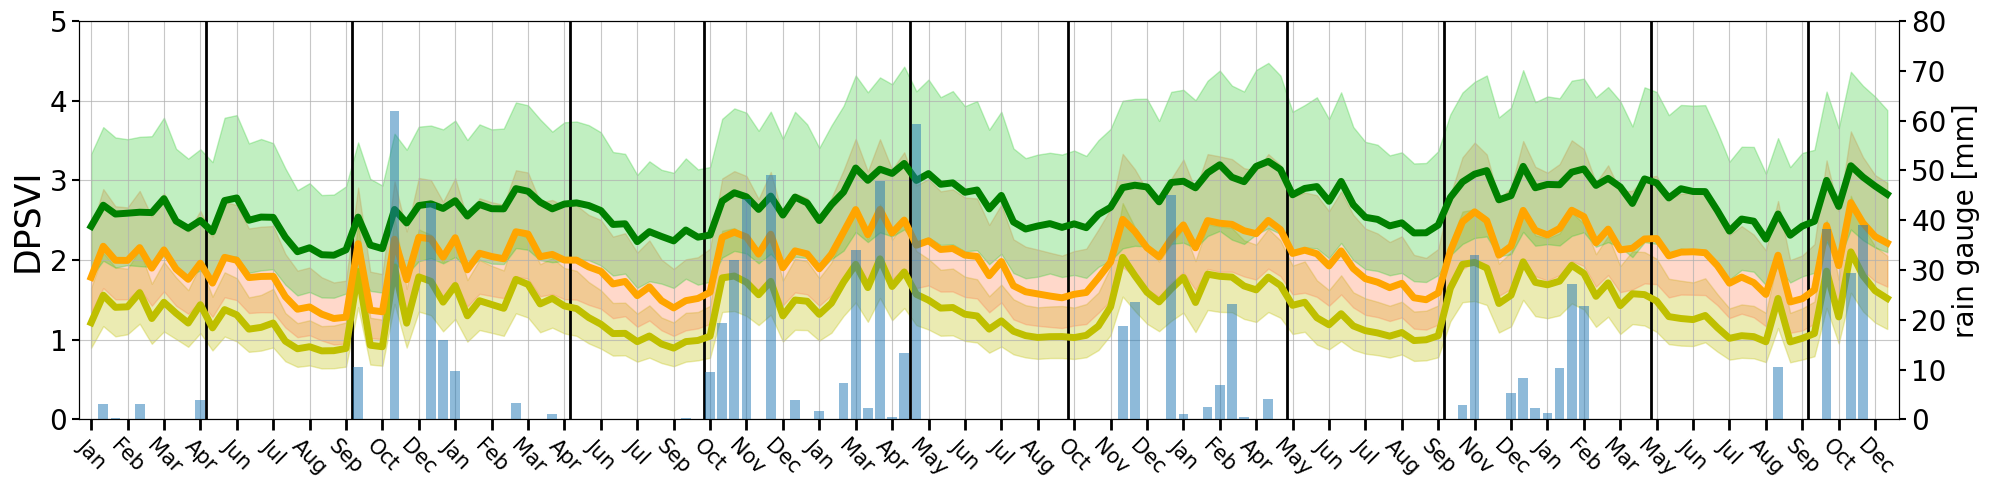

In [29]:
label_size = 20

x = dpsvi10_f.index

y_f = dpsvi10_f
y_s = dpsvi10_s
y_c = dpsvi10_c

fig, ax = plt.subplots(figsize=(20,5))

ax.vlines(x[9] + 0.5, ymin=0, ymax=10, colors='k', linewidth=2)
ax.vlines(x[21] + 0.5, ymin=0, ymax=10, colors='k', linewidth=2)
ax.vlines(x[39] + 0.5, ymin=0, ymax=10, colors='k', linewidth=2)
ax.vlines(x[50] + 0.5, ymin=0, ymax=10, colors='k', linewidth=2)
ax.vlines(x[67] + 0.5, ymin=0, ymax=10, colors='k', linewidth=2)
ax.vlines(x[80] + 0.5, ymin=0, ymax=10, colors='k', linewidth=2)
ax.vlines(x[98] + 0.5, ymin=0, ymax=10, colors='k', linewidth=2)
ax.vlines(x[111] + 0.5, ymin=0, ymax=10, colors='k', linewidth=2)
ax.vlines(x[128] + 0.5, ymin=0, ymax=10, colors='k', linewidth=2)
ax.vlines(x[141] + 0.5, ymin=0, ymax=10, colors='k', linewidth=2)

ax.plot(x, y_c['median'], 'y', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')
ax.fill_between(x, y_c['percentile_25'], y_c['percentile_75'], alpha=0.3, color='y')

ax.plot(x, y_s['median'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.fill_between(x, y_s['percentile_25'], y_s['percentile_75'], alpha=0.3, color='coral')

ax.plot(x, y_f['median'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.fill_between(x, y_f['percentile_25'], y_f['percentile_75'], alpha=0.3, color='limegreen')

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=y_f['mes'], fontdict={'fontsize': 15, 'rotation': -45})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([0, 5])
ax.set_xlim([-1, 149])
ax.set_ylabel('DPSVI', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=8)
ax.grid(True, alpha=0.7)

sec_0 = ax.twinx()
sec_0.bar(rain['date'], rain['gauge_mm'], alpha=0.5)
sec_0.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
sec_0.locator_params(axis='y', nbins=12)
sec_0.set_ylim([0, 80])
sec_0.set_ylabel('rain gauge [mm]', fontsize=20)

#sec_0.set_yticks(np.linspace(sec_0.get_yticks()[0], sec_0.get_yticks()[-1], len(ax.get_yticks())))

plt.tight_layout()

plt.savefig('C:/Users/jales/Desktop/dpsvi_profiles.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

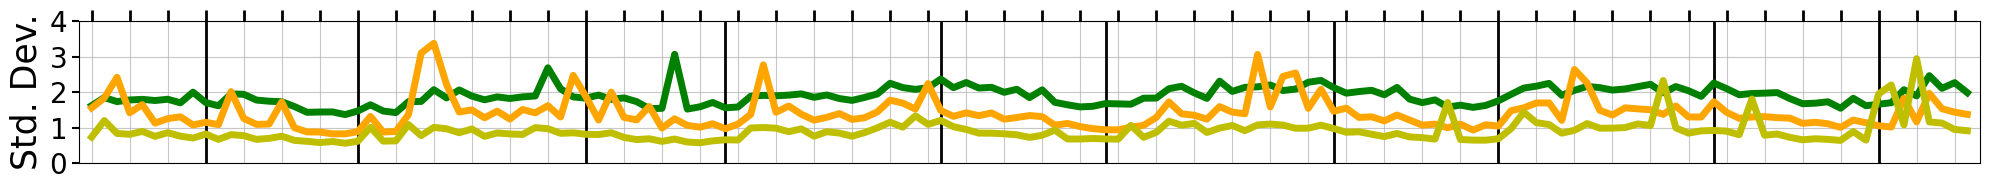

In [30]:
label_size = 20

x = dpsvi10_f.index

fig, ax = plt.subplots(figsize=(20,2))

ax.vlines(x[9], ymin=0, ymax=5, colors='k', linewidth=2)
ax.vlines(x[21], ymin=0, ymax=5, colors='k', linewidth=2)
ax.vlines(x[39], ymin=0, ymax=5, colors='k', linewidth=2)
ax.vlines(x[50], ymin=0, ymax=5, colors='k', linewidth=2)
ax.vlines(x[67], ymin=0, ymax=5, colors='k', linewidth=2)
ax.vlines(x[80], ymin=0, ymax=5, colors='k', linewidth=2)
ax.vlines(x[98], ymin=0, ymax=5, colors='k', linewidth=2)
ax.vlines(x[111], ymin=0, ymax=5, colors='k', linewidth=2)
ax.vlines(x[128], ymin=0, ymax=5, colors='k', linewidth=2)
ax.vlines(x[141], ymin=0, ymax=5, colors='k', linewidth=2)

ax.plot(x, dpsvi10_f['std'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.plot(x, dpsvi10_s['std'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.plot(x, dpsvi10_c['std'], 'y', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')

ax.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, length=8, width=2)
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=dpsvi10_f['mes'], fontdict={'fontsize': 20, 'rotation': -60})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([0, 4])
ax.set_xlim([-1, 149])
ax.set_ylabel('Std. Dev.', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=5)
ax.grid(True, alpha=0.7)

plt.tight_layout()

plt.savefig('C:/Users/jales/Desktop/dpsvi_std.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

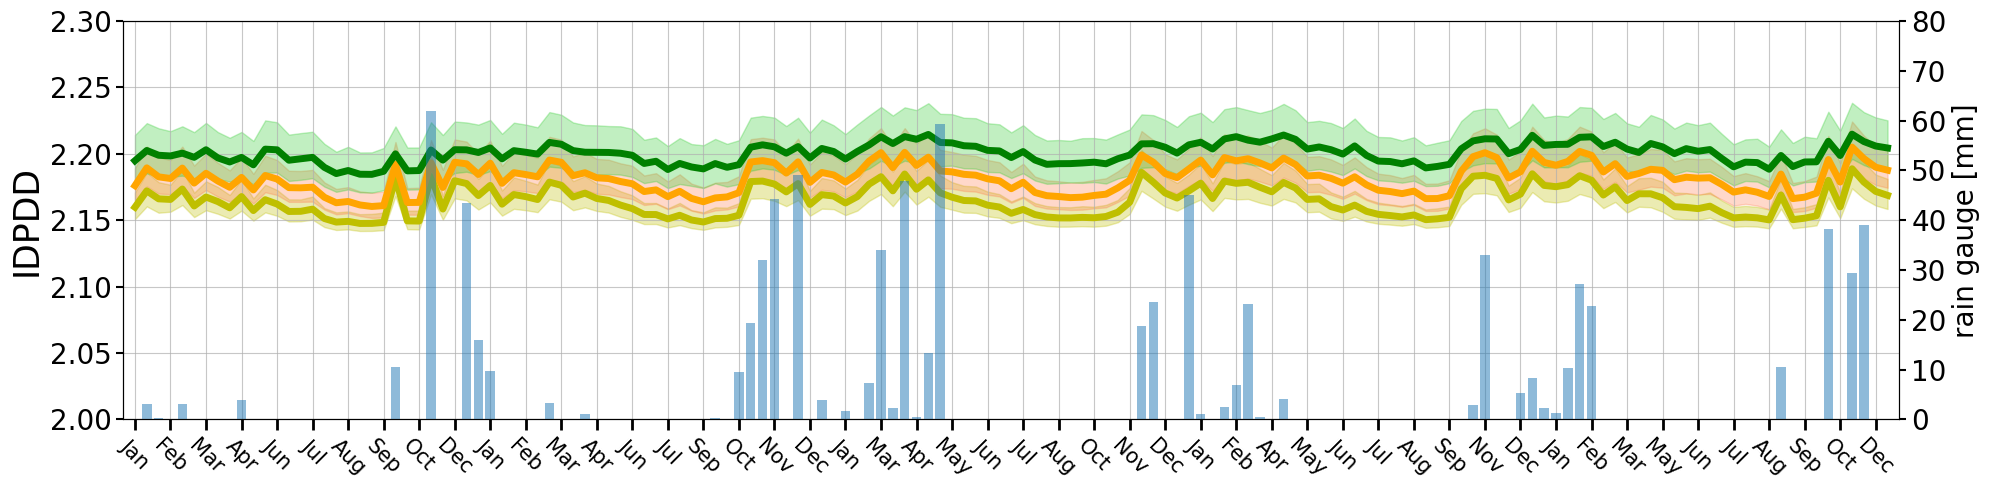

In [32]:
label_size = 20

x = idpdd_f.index

y_f = idpdd_f
y_s = idpdd_s
y_c = idpdd_c

fig, ax = plt.subplots(figsize=(20,5))

ax.vlines(x[9] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[21] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[39] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[50] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[67] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[80] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[98] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[111] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[128] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[141] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)

ax.plot(x, y_c['median'], 'y', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')
ax.fill_between(x, y_c['percentile_25'], y_c['percentile_75'], alpha=0.3, color='y')

ax.plot(x, y_s['median'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.fill_between(x, y_s['percentile_25'], y_s['percentile_75'], alpha=0.3, color='coral')

ax.plot(x, y_f['median'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.fill_between(x, y_f['percentile_25'], y_f['percentile_75'], alpha=0.3, color='limegreen')

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=y_f['mes'], fontdict={'fontsize': 15, 'rotation': -45})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([2, 2.3])
ax.set_xlim([-1, 149])
ax.set_ylabel('IDPDD', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=8)
ax.grid(True, alpha=0.7)

sec_0 = ax.twinx()
sec_0.bar(rain['date'], rain['gauge_mm'], alpha=0.5)
sec_0.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
sec_0.locator_params(axis='y', nbins=12)
sec_0.set_ylim([0, 80])
sec_0.set_ylabel('rain gauge [mm]', fontsize=20)

#sec_0.set_yticks(np.linspace(sec_0.get_yticks()[0], sec_0.get_yticks()[-1], len(ax.get_yticks())))

plt.tight_layout()

plt.savefig('C:/Users/jales/Desktop/idpdd_profiles.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

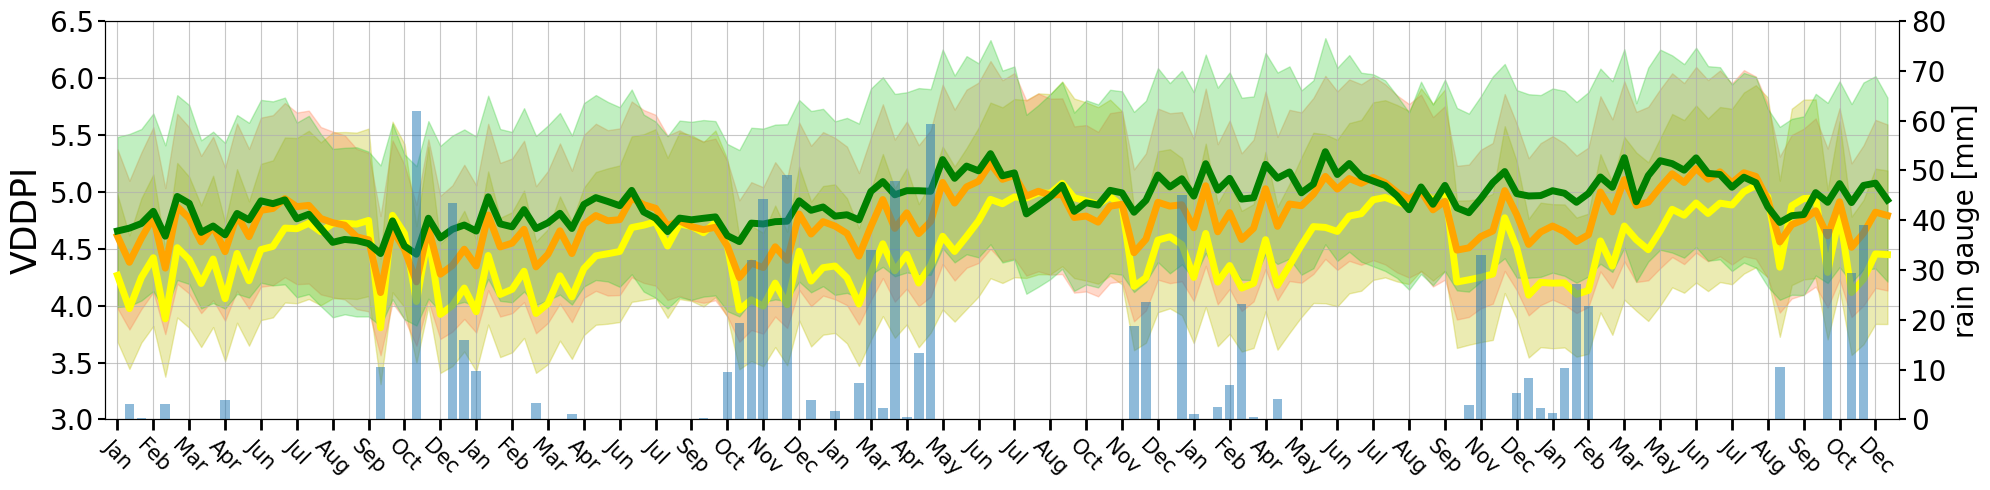

In [33]:
label_size = 20

x = vddpi_f.index

y_f = vddpi_f
y_s = vddpi_s
y_c = vddpi_c

fig, ax = plt.subplots(figsize=(20,5))

ax.vlines(x[9] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[21] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[39] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[50] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[67] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[80] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[98] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[111] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[128] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[141] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)

ax.plot(x, y_c['median'], 'yellow', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')
ax.fill_between(x, y_c['percentile_25'], y_c['percentile_75'], alpha=0.3, color='y')

ax.plot(x, y_s['median'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.fill_between(x, y_s['percentile_25'], y_s['percentile_75'], alpha=0.3, color='coral')

ax.plot(x, y_f['median'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.fill_between(x, y_f['percentile_25'], y_f['percentile_75'], alpha=0.3, color='limegreen')

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=y_f['mes'], fontdict={'fontsize': 15, 'rotation': -45})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([3, 6.5])
ax.set_xlim([-1, 149])
ax.set_ylabel('VDDPI', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=8)
ax.grid(True, alpha=0.7)

sec_0 = ax.twinx()
sec_0.bar(rain['date'], rain['gauge_mm'], alpha=0.5)
sec_0.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
sec_0.locator_params(axis='y', nbins=12)
sec_0.set_ylim([0, 80])
sec_0.set_ylabel('rain gauge [mm]', fontsize=20)

#sec_0.set_yticks(np.linspace(sec_0.get_yticks()[0], sec_0.get_yticks()[-1], len(ax.get_yticks())))

plt.tight_layout()

plt.savefig('C:/Users/jales/Desktop/vddpi_profiles.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

In [36]:
water = gpd.read_file('D:/thesis_data/ROI/classes/agua_10m_32723.geojson')
water = [geom for geom in water.geometry]

with rst.open('D:/thesis_data/VEG_INDICES/dpsvi_parameters/raster/dpsvi_parameters_20201222.tif') as raster:
    image, _ = mask(raster, water, invert=True, nodata=np.nan)

    dpsvi = image[2]

# dpsvi_parameters_20210714.tif

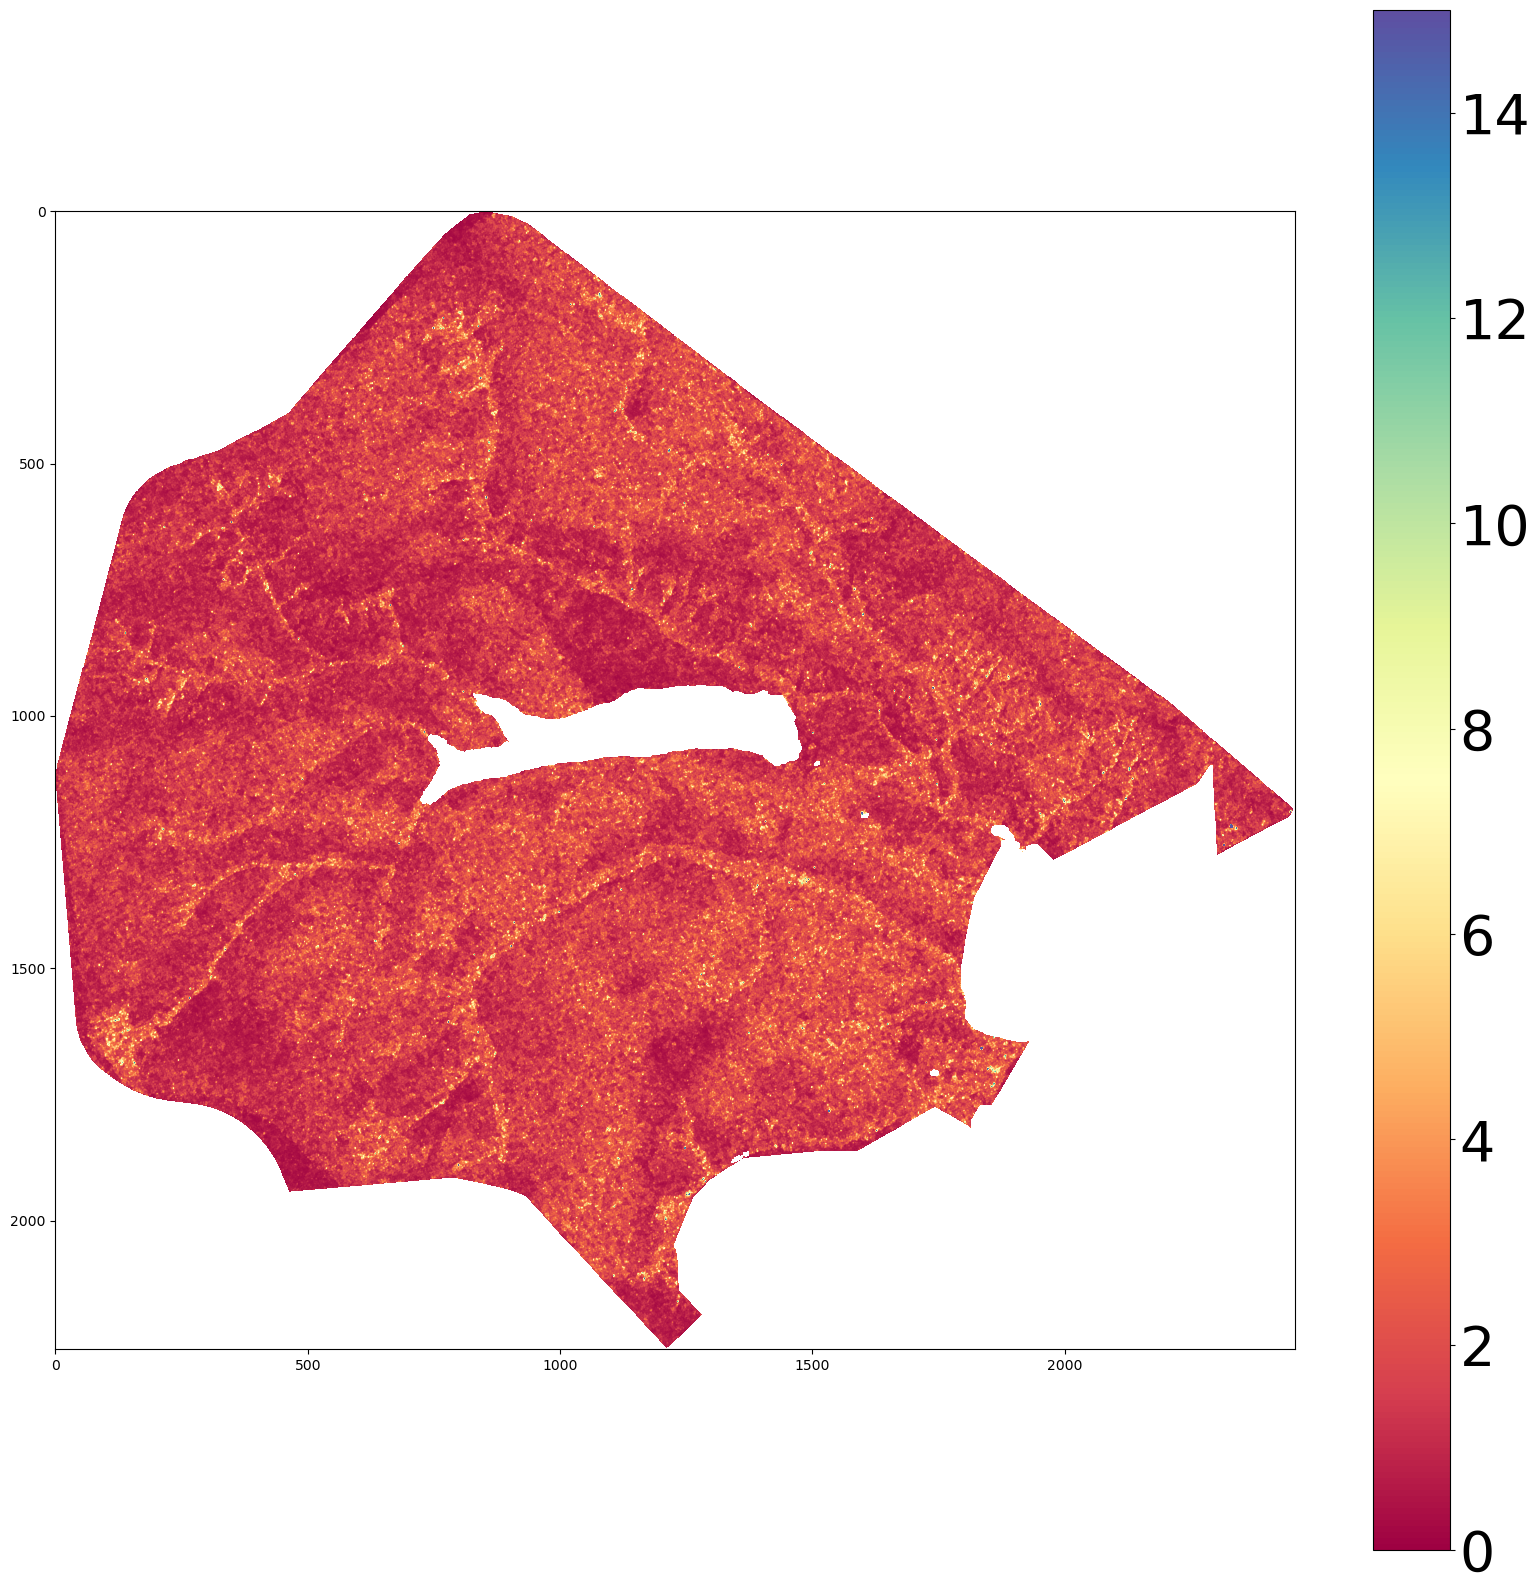

In [37]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.imshow(dpsvi, cmap='Spectral', vmin=0, vmax=15)

norm = Normalize(vmin=0, vmax=15)
cbar = fig.colorbar(cm.ScalarMappable(norm = norm, cmap='Spectral'), ax=ax, location='right')
cbar.ax.tick_params(labelsize=40)
cbar.ax.locator_params(axis='y', nbins=10)

plt.savefig('C:/Users/jales/Desktop/dpsvi_dry.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

In [38]:
import matplotlib.pyplot as plt
import rioxarray as rxr 
from shapely.geometry import mapping
import geopandas as gpd

In [39]:
# Open vector layer
florestal_path = 'D:/thesis_data/ROI/classes/form_florestal_30m_32723_buffer.geojson'
savanica_path = 'D:/thesis_data/ROI/classes/form_savanica_30m_32723_buffer.geojson'
campestre_path = 'D:/thesis_data/ROI/classes/form_campestre_30m_32723_buffer.geojson'

In [40]:
# Clip raster para cada classe vectorial de interesse
crop_savanica = gpd.read_file(savanica_path)
crop_campestre = gpd.read_file(campestre_path)
crop_florestal = gpd.read_file(florestal_path)

In [44]:
raster = rxr.open_rasterio('D:/thesis_data/VEG_INDICES/dpsvi_parameters/raster/dpsvi_parameters_20201222.tif', masked=True)
dpsvi = raster.sel(band=3)

# dpsvi_parameters_20210714.tif

In [45]:
florestal_dpsvi = dpsvi.rio.clip(crop_florestal.geometry.apply(mapping))
savanica_dpsvi = dpsvi.rio.clip(crop_savanica.geometry.apply(mapping))
campestre_dpsvi = dpsvi.rio.clip(crop_campestre.geometry.apply(mapping))

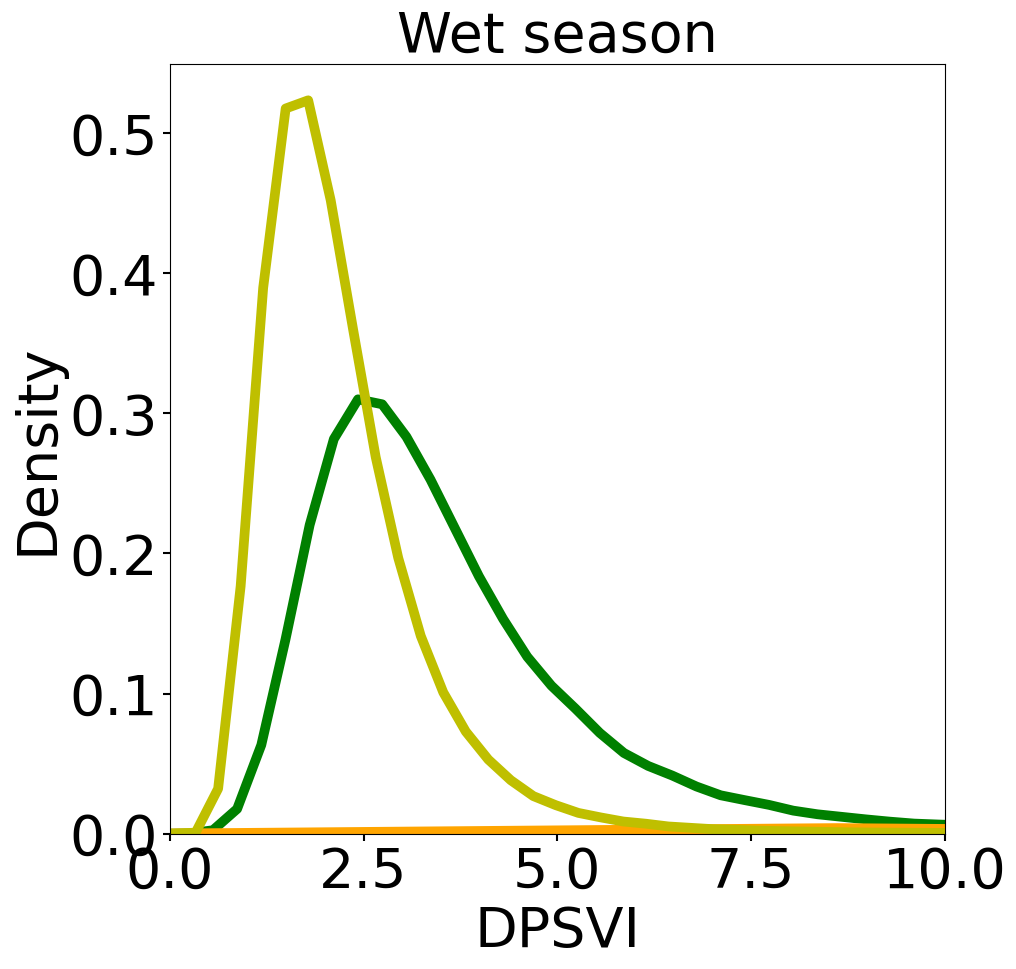

In [46]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

bins=1500

sns.distplot(florestal_dpsvi, bins=bins, hist=False, color='green', kde_kws={'linewidth': 7}, label='Forest')
sns.distplot(savanica_dpsvi, bins=bins, hist=False, color='orange', kde_kws={'linewidth': 7}, label='Savanna')
sns.distplot(campestre_dpsvi, bins=bins, hist=False, color='y', kde_kws={'linewidth': 7}, label='Grassland')

ax.set_title('Wet season', fontdict={'fontsize':40})
ax.set_ylabel('Density', fontsize=40)
ax.set_xlim([0, 10])
#ax.set_ylim([0, 1.8])
ax.set_xlabel('DPSVI', fontsize=40)
ax.tick_params(axis='y', length=5, width=1.5, labelsize=40)
ax.tick_params(axis='x', length=5, width=1.5, labelsize=40)

plt.savefig('C:/Users/jales/Desktop/dpsvi_dists_wet.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)